In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tinydb import TinyDB, Query

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
nb_clusters = 10
nb_nodes = 680

# Bubbles

In [4]:
bubbles = True
quarantines = 1 - bubbles

In [5]:
if bubbles:
    db = TinyDB("RESULTS/%dnodes/Aggregate_res_bubbles_%dclusters.json"%(nb_nodes,nb_clusters))
elif quarantines:
    db = TinyDB("RESULTS/%dnodes/Aggregate_res_quarantines_%dclusters.json"%(nb_nodes,nb_clusters))

In [6]:
#db.all()

In [7]:
len(db)

23

In [8]:
#db.remove(Res.p == 552)  
#db.get(doc_id=66)
#db.remove(doc_ids=[4,5])

In [9]:
Res = Query()

In [10]:
rounds = False

In [11]:
results = db.search(Res.Rounds == rounds)
results

[{'p_intra': 0.00622,
  'p': 5,
  'epsI': 0.25,
  'epsT': 0,
  'Rounds': False,
  'maxInf': 291.78499999999997,
  'Time1cl': 70.91666666666667,
  'Time25': 75.91666666666667,
  'Time50': 81.91666666666667,
  'Time80': 91.91666666666667},
 {'p_intra': 0.01209,
  'p': 20,
  'epsI': 0.25,
  'epsT': 0,
  'Rounds': False,
  'maxInf': 261.29499999999996,
  'Time1cl': 45.916666666666664,
  'Time25': 51.916666666666664,
  'Time50': 55.916666666666664,
  'Time80': 60.916666666666664},
 {'p_intra': 0.01491,
  'p': 50,
  'epsI': 0.25,
  'epsT': 0,
  'Rounds': False,
  'maxInf': 248.98499999999999,
  'Time1cl': 47.916666666666664,
  'Time25': 56.916666666666664,
  'Time50': 60.916666666666664,
  'Time80': 65.91666666666667},
 {'p_intra': 0.01616,
  'p': 100,
  'epsI': 0.25,
  'epsT': 0,
  'Rounds': False,
  'maxInf': 213.94,
  'Time1cl': 53.916666666666664,
  'Time25': 72.91666666666667,
  'Time50': 77.91666666666667,
  'Time80': 82.91666666666667},
 {'p_intra': 0.01663,
  'p': 150,
  'epsI': 0.25

In [12]:
#delete item
'''
YourSelection=Query()
db.remove(YourSelection.Rounds == 20)
'''

'\nYourSelection=Query()\ndb.remove(YourSelection.Rounds == 20)\n'

In [18]:
if nb_nodes == 680:
    len_p_list = 8
else:
    len_p_list = 6

In [19]:
p_list = [r['p'] for r in results if r['epsI']==0.25]
p_list = np.sort(p_list)
p_list = p_list[:len_p_list]
p_list

array([  5,  20,  50, 100, 150, 200])

$\epsilon_I = 0.1$

In [14]:
t1cl_1 = []
for n in range(len_p_list):
    t1cl_1.append([r['Time1cl'] for r in results if (r['epsI']==0.1 and r['p']==p_list[n])][0])


t50_1 = []
for n in range(len_p_list):
    t50_1.append([r['Time50'] for r in results if (r['epsI']==0.1 and r['p']==p_list[n])][0])
       

t80_1 = []
for n in range(len_p_list):
    t80_1.append([r['Time80'] for r in results if (r['epsI']==0.1 and r['p']==p_list[n])][0])


In [15]:
maxInf_1 = []
for n in range(len_p_list):
    maxInf_1.append([r['maxInf'] for r in results if (r['epsI']==0.1 and r['p']==p_list[n])][0])


$\epsilon_I = 0.25$

In [20]:
t1cl_2 = []
for n in range(len_p_list):
    t1cl_2.append([r['Time1cl'] for r in results if (r['epsI']==0.25 and r['p']==p_list[n])][0])

t50_2 = []
for n in range(len_p_list):
    t50_2.append([r['Time50'] for r in results if (r['epsI']==0.25 and r['p']==p_list[n])][0])

t80_2 = []
for n in range(len_p_list):
    t80_2.append([r['Time80'] for r in results if (r['epsI']==0.25 and r['p']==p_list[n])][0])
      

In [21]:
maxInf_2 = []
for n in range(len_p_list):
    maxInf_2.append([r['maxInf'] for r in results if (r['epsI']==0.25 and r['p']==p_list[n])][0])        

$\epsilon_I = 0.4$

In [18]:
t1cl_3 = []
for n in range(len_p_list):
    t1cl_3.append([r['Time1cl'] for r in results if (r['epsI']==0.4 and r['p']==p_list[n])][0])        

t50_3 = []
for n in range(len_p_list):
    t50_3.append([r['Time50'] for r in results if (r['epsI']==0.4 and r['p']==p_list[n])][0])        

t80_3 = []
for n in range(len_p_list):
    t80_3.append([r['Time80'] for r in results if (r['epsI']==0.4 and r['p']==p_list[n])][0])        

In [19]:
maxInf_3 = []
for n in range(len_p_list):
    maxInf_3.append([r['maxInf'] for r in results if (r['epsI']==0.4 and r['p']==p_list[n])][0])        

In [22]:
# palette
sim_inf_color = '#f18f01'
k1cl_color = '#362035'#'#643c62'
k50_color = '#856284'#'#976f95'
k80_color = '#CCB2CE'#'#bea5bd'

In [23]:
# legend
'''
plt.plot(p_list,t1cl_1,'o-',label=r'Time to reach 25% knowledge',c=k1cl_color)
plt.plot(p_list,t50_1,'o-',label=r'Time to reach 50% knowledge',c=k50_color)
plt.plot(p_list,t80_1,'o-',label=r'Time to reach 80% knowledge',c=k80_color)
plt.plot(p_list,maxInf_1,'*-',c=sim_inf_color,markersize=10,label='simultaneous infected')
plt.legend(loc='center')
plt.savefig('Figures/Opt_p/legend_opt_p.pdf')
plt.show()
'''

"\nplt.plot(p_list,t1cl_1,'o-',label=r'Time to reach 25% knowledge',c=k1cl_color)\nplt.plot(p_list,t50_1,'o-',label=r'Time to reach 50% knowledge',c=k50_color)\nplt.plot(p_list,t80_1,'o-',label=r'Time to reach 80% knowledge',c=k80_color)\nplt.plot(p_list,maxInf_1,'*-',c=sim_inf_color,markersize=10,label='simultaneous infected')\nplt.legend(loc='center')\nplt.savefig('Figures/Opt_p/legend_opt_p.pdf')\nplt.show()\n"

NameError: name 't80_1' is not defined

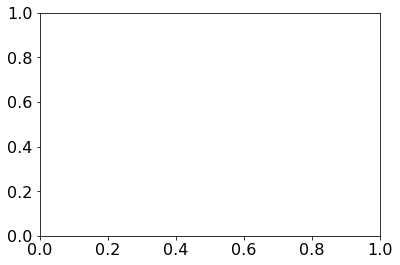

In [24]:
fig = plt.figure(figsize=(6.1,4.1))
ax1 = plt.subplot(111)

ax1.plot(p_list,t80_1,'o-',label=r'80%',c=k80_color)
ax1.plot(p_list,t80_2,'o--',c=k80_color)
ax1.plot(p_list,t80_3,'o:',c=k80_color)

ax1.plot(p_list,t50_1,'o-',label=r'50%',c=k50_color)
ax1.plot(p_list,t50_2,'o--',c=k50_color)
ax1.plot(p_list,t50_3,'o:',c=k50_color)

#ax1.plot(p_list,t20_1,'o-',label='20%',c='blue')
#ax1.plot(p_list,t20_2,'o--',c='blue')
#ax1.plot(p_list,t20_3,'o:',c='blue')

ax1.plot(p_list,t1cl_1,'o-',label=r'25%',c=k1cl_color)
ax1.plot(p_list,t1cl_2,'o--',c=k1cl_color)
ax1.plot(p_list,t1cl_3,'o:',c=k1cl_color)
if nb_clusters == 5:
    plt.gca().set_ylim(bottom = 50,top=130)
elif nb_clusters == 10:
    plt.gca().set_ylim(bottom = 20,top=130)
elif nb_clusters == 20:
    plt.gca().set_ylim(bottom = 15,top=130)
ax1.yaxis.label.set_color('#643C62')
ax1.tick_params(colors='#643C62', axis='y') 




ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(p_list,maxInf_1,'*-',c=sim_inf_color,markersize=10)
ax2.plot(p_list,maxInf_2,'*--',c=sim_inf_color,markersize=10)
ax2.plot(p_list,maxInf_3,'*:',c=sim_inf_color,markersize=10)
if nb_clusters == 5:
    plt.gca().set_ylim(bottom = 25,top=470)
elif nb_clusters == 10:
    plt.gca().set_ylim(bottom = 25,top=485)
elif nb_clusters == 20:
    plt.gca().set_ylim(bottom = 25,top=485)
ax2.yaxis.label.set_color(sim_inf_color)
ax2.tick_params(colors=sim_inf_color, which='both') 

ax1.set_xlabel('p')
ax1.set_ylabel('Time of nodes\' partial knowledge')
ax2.set_ylabel('max nb. infected')

# Shrink current ax1is by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax1is
#ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1))
#ax1.legend(loc='upper right')

#ax2.legend(loc='upper center')#, bbox_to_anchor=(0, 0.5))

#plt.tight_layout()

if rounds == False:
    plt.savefig('Figures/Opt_p/opt_p_bubbles_%dclusters.pdf'%(nb_clusters),bbox_inches='tight')
else:
    plt.savefig('Figures/Opt_p/opt_p_bubbles_%dclusters_rounds%ddays.pdf'%(nb_clusters,rounds),bbox_inches='tight')

plt.show()


In [23]:
# legend:
'''
fig = plt.figure(figsize=(6.1,4.1))
ax1 = plt.subplot(111)
ax1.plot(p_list,t1cl_1,'-',label=r'25%',c='darkgrey')
ax1.plot(p_list,t1cl_2,'--',label=r'25%',c='darkgrey')
ax1.plot(p_list,t1cl_3,':',label=r'25%',c='darkgrey')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_xlabel('p')
ax1.set_ylabel('Time of nodes\' partial knowledge')
# Shrink current ax1is by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current ax1is
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1))
#plt.tight_layout()
plt.savefig('Figures/Opt_p/legend.pdf',bbox_inches='tight')
plt.show()
'''

"\nfig = plt.figure(figsize=(6.1,4.1))\nax1 = plt.subplot(111)\nax1.plot(p_list,t1cl_1,'-',label=r'25%',c='darkgrey')\nax1.plot(p_list,t1cl_2,'--',label=r'25%',c='darkgrey')\nax1.plot(p_list,t1cl_3,':',label=r'25%',c='darkgrey')\nax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\nax1.set_xlabel('p')\nax1.set_ylabel('Time of nodes' partial knowledge')\n# Shrink current ax1is by 20%\nbox = ax1.get_position()\nax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])\n# Put a legend to the right of the current ax1is\nax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1))\n#plt.tight_layout()\nplt.savefig('Figures/Opt_p/legend.pdf',bbox_inches='tight')\nplt.show()\n"

# Quarantines

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tinydb import TinyDB, Query


In [25]:
plt.rcParams.update({'font.size': 16})

In [26]:
nb_clusters = 20

In [27]:
bubbles = False
quarantines = 1 - bubbles

In [28]:
if bubbles:
    db = TinyDB("RESULTS/Aggregate_res_bubbles_%dclusters.json"%(nb_clusters))
elif quarantines:
    db = TinyDB("RESULTS/Aggregate_res_quarantines_%dclusters.json"%(nb_clusters))

In [29]:
#db.all()

In [30]:
len(db)

17

In [31]:
Res = Query()

In [32]:
rounds = False

In [33]:
results = db.search(Res.Rounds == rounds)
#results

In [34]:
#epsT_list = [r['epsT'] for r in results if r['epsI']==0.1]
epsT_list = [0.01, 0.1, 0.4]

In [35]:
t1cl_1 = []
t1cl_1.append([r['Time1cl'] for r in results if (r['epsI']==0.1 and r['epsT']==0.01)][0])
t1cl_1.append([r['Time1cl'] for r in results if (r['epsI']==0.1 and r['epsT']==0.1)][0])
t1cl_1.append([r['Time1cl'] for r in results if (r['epsI']==0.1 and r['epsT']==0.4)][0]) 

t50_1 = []
t50_1.append([r['Time50'] for r in results if (r['epsI']==0.1 and r['epsT']==0.01)][0])
t50_1.append([r['Time50'] for r in results if (r['epsI']==0.1 and r['epsT']==0.1)][0])
t50_1.append([r['Time50'] for r in results if (r['epsI']==0.1 and r['epsT']==0.4)][0])   

t80_1 = []
t80_1.append([r['Time80'] for r in results if (r['epsI']==0.1 and r['epsT']==0.01)][0])
t80_1.append([r['Time80'] for r in results if (r['epsI']==0.1 and r['epsT']==0.1)][0])
t80_1.append([r['Time80'] for r in results if (r['epsI']==0.1 and r['epsT']==0.4)][0])        

In [36]:
maxInf_1 = []
maxInf_1.append([r['maxInf'] for r in results if (r['epsI']==0.1 and r['epsT']==0.01)][0])
maxInf_1.append([r['maxInf'] for r in results if (r['epsI']==0.1 and r['epsT']==0.1)][0])
maxInf_1.append([r['maxInf'] for r in results if (r['epsI']==0.1 and r['epsT']==0.4)][0])        

In [37]:
t1cl_2 = []
t1cl_2.append([r['Time1cl'] for r in results if (r['epsI']==0.25 and r['epsT']==0.01)][0])
t1cl_2.append([r['Time1cl'] for r in results if (r['epsI']==0.25 and r['epsT']==0.1)][0])
t1cl_2.append([r['Time1cl'] for r in results if (r['epsI']==0.25 and r['epsT']==0.4)][0]) 

t50_2 = []
t50_2.append([r['Time50'] for r in results if (r['epsI']==0.25 and r['epsT']==0.01)][0])
t50_2.append([r['Time50'] for r in results if (r['epsI']==0.25 and r['epsT']==0.1)][0])
t50_2.append([r['Time50'] for r in results if (r['epsI']==0.25 and r['epsT']==0.4)][0])   

t80_2 = []
t80_2.append([r['Time80'] for r in results if (r['epsI']==0.25 and r['epsT']==0.01)][0])
t80_2.append([r['Time80'] for r in results if (r['epsI']==0.25 and r['epsT']==0.1)][0])
t80_2.append([r['Time80'] for r in results if (r['epsI']==0.25 and r['epsT']==0.4)][0])        

In [38]:
maxInf_2 = []
maxInf_2.append([r['maxInf'] for r in results if (r['epsI']==0.25 and r['epsT']==0.01)][0])
maxInf_2.append([r['maxInf'] for r in results if (r['epsI']==0.25 and r['epsT']==0.1)][0])
maxInf_2.append([r['maxInf'] for r in results if (r['epsI']==0.25 and r['epsT']==0.4)][0])        

In [39]:
t1cl_3 = []
t1cl_3.append([r['Time1cl'] for r in results if (r['epsI']==0.4 and r['epsT']==0.01)][0])
t1cl_3.append([r['Time1cl'] for r in results if (r['epsI']==0.4 and r['epsT']==0.1)][0])
t1cl_3.append([r['Time1cl'] for r in results if (r['epsI']==0.4 and r['epsT']==0.4)][0]) 

t50_3 = []
t50_3.append([r['Time50'] for r in results if (r['epsI']==0.4 and r['epsT']==0.01)][0])
t50_3.append([r['Time50'] for r in results if (r['epsI']==0.4 and r['epsT']==0.1)][0])
t50_3.append([r['Time50'] for r in results if (r['epsI']==0.4 and r['epsT']==0.4)][0])   

t80_3 = []
t80_3.append([r['Time80'] for r in results if (r['epsI']==0.4 and r['epsT']==0.01)][0])
t80_3.append([r['Time80'] for r in results if (r['epsI']==0.4 and r['epsT']==0.1)][0])
t80_3.append([r['Time80'] for r in results if (r['epsI']==0.4 and r['epsT']==0.4)][0])        

In [40]:
maxInf_3 = []
maxInf_3.append([r['maxInf'] for r in results if (r['epsI']==0.4 and r['epsT']==0.01)][0])
maxInf_3.append([r['maxInf'] for r in results if (r['epsI']==0.4 and r['epsT']==0.1)][0])
maxInf_3.append([r['maxInf'] for r in results if (r['epsI']==0.4 and r['epsT']==0.4)][0])        

In [41]:
epsT_list = np.sort(epsT_list)

In [42]:
# palette
sim_inf_color = '#f18f01'
k1cl_color = '#362035'#'#643c62'
k50_color = '#856284'#'#976f95'
k80_color = '#CCB2CE'#'#bea5bd'

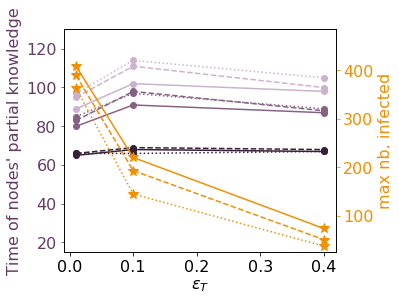

In [43]:
fig = plt.figure(figsize=(6.1,4.1))
ax1 = plt.subplot(111)

ax1.plot(epsT_list,t80_1,'o-',label=r'80%',c=k80_color)
ax1.plot(epsT_list,t80_2,'o--',c=k80_color)
ax1.plot(epsT_list,t80_3,'o:',c=k80_color)

ax1.plot(epsT_list,t50_1,'o-',label=r'50%',c=k50_color)
ax1.plot(epsT_list,t50_2,'o--',c=k50_color)
ax1.plot(epsT_list,t50_3,'o:',c=k50_color)

#ax1.plot(epsT_list,t20_1,'o-',label='20%',c='blue')
#ax1.plot(epsT_list,t20_2,'o--',c='blue')
#ax1.plot(epsT_list,t20_3,'o:',c='blue')

ax1.plot(epsT_list,t1cl_1,'o-',label=r'25%',c=k1cl_color)
ax1.plot(epsT_list,t1cl_2,'o--',c=k1cl_color)
ax1.plot(epsT_list,t1cl_3,'o:',c=k1cl_color)

if nb_clusters == 5:
    plt.gca().set_ylim(bottom = 50,top=130)
elif nb_clusters == 10:
    plt.gca().set_ylim(bottom = 20,top=130)
elif nb_clusters == 20:
    plt.gca().set_ylim(bottom = 15,top=130)
ax1.yaxis.label.set_color('#643C62')
ax1.tick_params(colors='#643C62', axis='y') 


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(epsT_list,maxInf_1,'*-',c=sim_inf_color,markersize=10)
ax2.plot(epsT_list,maxInf_2,'*--',c=sim_inf_color,markersize=10)
ax2.plot(epsT_list,maxInf_3,'*:',c=sim_inf_color,markersize=10)
if nb_clusters == 5:
    plt.gca().set_ylim(bottom = 25,top=470)
elif nb_clusters == 10:
    plt.gca().set_ylim(bottom = 25,top=485)
elif nb_clusters == 20:
    plt.gca().set_ylim(bottom = 25,top=485)
ax2.yaxis.label.set_color(sim_inf_color)
ax2.tick_params(colors=sim_inf_color, which='both') 

ax1.set_xlabel(r'$\varepsilon_T$')
ax1.set_ylabel('Time of nodes\' partial knowledge')
ax2.set_ylabel('max nb. infected')

# Shrink current ax1is by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax1is
#ax1.legend(loc='lower right',ncol=3)
#ax2.legend(loc='upper center')#, bbox_to_anchor=(0, 0.5))

#plt.tight_layout()
plt.savefig('Figures/Opt_p/opt_p_quarantines_%dclusters.pdf'%(nb_clusters),bbox_inches='tight')

plt.show()


In [44]:
db.search(Res.epsT == 0.1)


[{'p_intra': 0.00725,
  'p': 5,
  'epsI': 0.4,
  'epsT': 0.1,
  'Rounds': False,
  'maxInf': 144.89000000000001,
  'Time1cl': 65.91666666666667,
  'Time25': 77.91666666666667,
  'Time50': 96.91666666666667,
  'Time80': 113.91666666666667},
 {'p_intra': 0.00725,
  'p': 5,
  'epsI': 0.1,
  'epsT': 0.1,
  'Rounds': False,
  'maxInf': 220.27,
  'Time1cl': 67.91666666666667,
  'Time25': 79.91666666666667,
  'Time50': 90.91666666666667,
  'Time80': 101.91666666666667},
 {'p_intra': 0.00725,
  'p': 5,
  'epsI': 0.25,
  'epsT': 0.1,
  'Rounds': False,
  'maxInf': 193.20999999999998,
  'Time1cl': 68.91666666666667,
  'Time25': 82.91666666666667,
  'Time50': 97.91666666666667,
  'Time80': 110.91666666666667},
 {'p_intra': 0.00725,
  'p': 5,
  'epsI': 0.25,
  'epsT': 0.1,
  'Rounds': False,
  'maxInf': 193.20999999999998,
  'Time1cl': 68.91666666666667,
  'Time25': 82.91666666666667,
  'Time50': 97.91666666666667,
  'Time80': 110.91666666666667},
 {'p_intra': 0.00725,
  'p': 5,
  'epsI': 0.25,
  

In [45]:
epsT_list,t80_1

(array([0.01, 0.1 , 0.4 ]),
 [88.91666666666667, 101.91666666666667, 97.91666666666667])